### 4-Sklearn

Scikit-Learn builds upon NumPy and SciPy and complements this scientific environment with machine learning algorithms;

#### 4-1 Algorithms


Supervised learning:

    Linear models (Ridge, Lasso, Elastic Net, ...)
    Support Vector Machines
    Tree-based methods (Random Forests, Bagging, GBRT, ...)
    Nearest neighbors
    Neural networks (basics)
    Gaussian Processes
    Feature selection

Unsupervised learning:

    Clustering (KMeans, Ward, ...)
    Matrix decomposition (PCA, ICA, ...)
    Density estimation
    Outlier detection


Model selection and evaluation:

    Cross-validation
    Grid-search
    Lots of metrics



In [1]:
# import Dataset to play with it
import pandas as pd
import numpy as np
import sklearn as sk

iris = pd.read_csv('Iris.csv')
train = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('house-prices-advanced-regression-techniques/test.csv')

'''

    Each row is an observation (also known as : sample, example, instance, record)
    Each column is a feature (also known as: Predictor, attribute, Independent Variable, input, regressor, Covariate)

'''

'\n\n    Each row is an observation (also known as : sample, example, instance, record)\n    Each column is a feature (also known as: Predictor, attribute, Independent Variable, input, regressor, Covariate)\n\n'

In [2]:
type(iris)

pandas.core.frame.DataFrame

4-3 Framework

Data comes as a finite learning set ${\cal L} = (X, y)$ where

Input samples are given as an array $X$ of shape n_samples $\times$ n_features, taking their values in ${\cal X}$;
Output values are given as an array $y$, taking symbolic values in ${\cal Y}$. 

The goal of supervised classification is to build an estimator $\varphi: {\cal X} \mapsto {\cal Y}$ minimizing
$$Err(φ)=𝔼X,Y{ℓ(Y,φ(X))}$$
where $\ell$ is a loss function, e.g., the zero-one loss for classification $\ell_{01}(Y,\hat{Y}) = 1(Y \neq \hat{Y})$.

In [3]:
from sklearn.datasets import make_blobs
#scikit中的make_blobs方法常被用来生成聚类算法的测试数据，直观地说，make_blobs会根据用户指定的特征数量、中心点数量、范围等来生成几类数据，这些数据可用于测试聚类算法的效果。
import numpy as np
from matplotlib import pyplot as plt
%pylab inline
X, y = make_blobs(n_samples=1000, centers=20, random_state=123) #输出数据集X和标签列y
labels = ["b", "r"]
y = np.take(labels, (y < 10))
print(X) 
print(y[:5])

Populating the interactive namespace from numpy and matplotlib
[[-6.45255647 -8.76358259]
 [ 0.28982141  0.14677196]
 [-5.18412293 -1.25347025]
 ...
 [-0.23142814 -1.60800704]
 [-0.60291835  6.87297279]
 [ 2.28425964  4.87408773]]
['r' 'r' 'b' 'r' 'b']


/Users/mac/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [41]:
(print(X[[1,2,3]]))
print(X[:5])
print(X[500:510,0])
print(X[y == "b"][:5])  # 5 first rows for which y is "b" 

[[ 0.28982141  0.14677196]
 [-5.18412293 -1.25347025]
 [-4.71388847  3.67440463]]
[[-6.45255647 -8.76358259]
 [ 0.28982141  0.14677196]
 [-5.18412293 -1.25347025]
 [-4.71388847  3.67440463]
 [ 4.51558296 -2.88138033]]
[-4.43836309 -2.45974437  4.33104832 -7.92069399  1.56972029  0.56451501
  4.99608298  4.75811106 -1.60421418  1.10129122]
[[-5.18412293 -1.25347025]
 [ 4.51558296 -2.88138033]
 [ 1.70826922  2.62387342]
 [-0.52606562  8.95985097]
 [-1.07591403  9.78730967]]


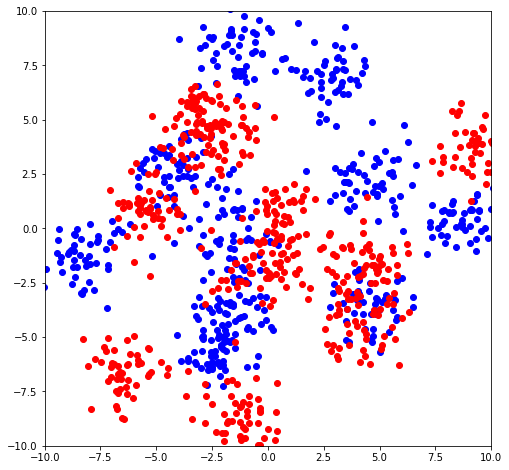

In [46]:
#plot
plt.rcParams["figure.figsize"]=(8,8)
plt.rcParams["figure.max_open_warning"]= -1
plt.figure()
for label in labels:
    mask = (y == label)
    plt.scatter(X[mask,0],X[mask,1], c= label) #  散点图，x轴，y轴，c是colour。('b'=blue,'r'=red)
plt.xlim(-10,10) # x-axis limitation
plt.ylim(-10,10) # y-axis limitation
plt.show()

In [51]:
from sklearn.datasets import load_wine
data = load_wine()#

data2=data.target[[10,80,140]]# 多分类数据集
list(data.target_names)
data2

array([0, 1, 2])

In [58]:
from sklearn.cluster import DBSCAN # DBSCAN  基于密度的聚类算法
import numpy as np
X = np.array([[1, 2], [2, 2], [2, 3],[8, 7], [8, 8], [25, 80]])
clustering = DBSCAN(eps=3, min_samples=2).fit(X)
clustering.labels_

array([ 0,  0,  0,  1,  1, -1])

In [64]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_digits
X = load_digits().data
#%timeit NMF(n_components=16, tol=1e-2).fit(X)
print(X.shape)

(1797, 64)


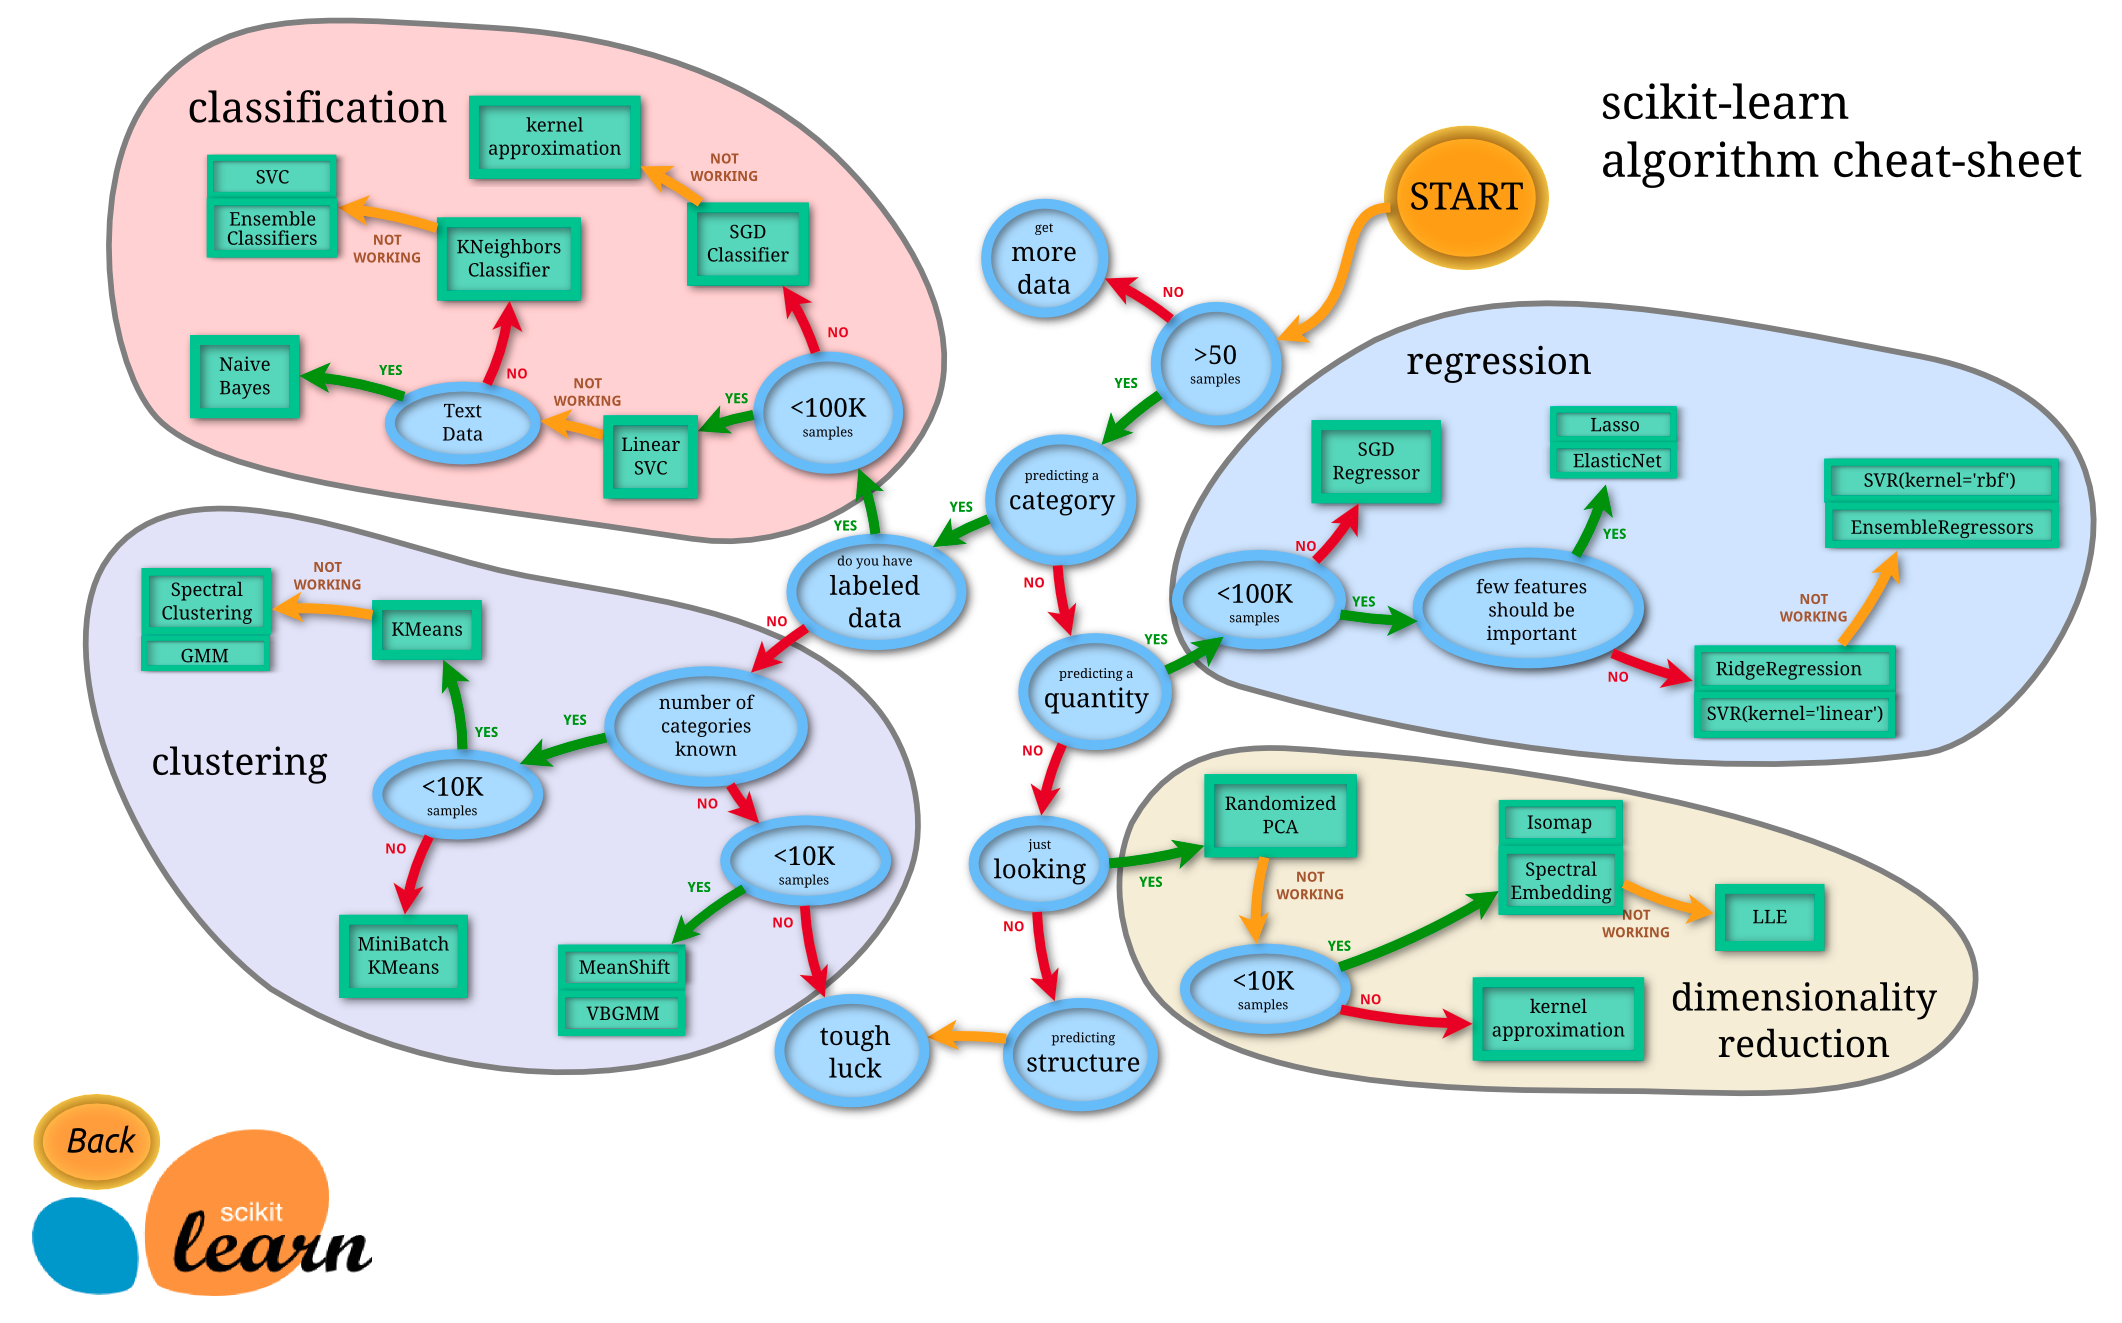
And if we want to categorize ML algorithms with the type of learning, there are below type:

    Classification
        k-Nearest Neighbors
        LinearRegression
        SVM
        DT
        NN

    clustering
        K-means
        HCA
        Expectation Maximization

    Visualization and dimensionality reduction:
        Principal Component Analysis(PCA)
        Kernel PCA
        Locally -Linear Embedding (LLE)
        t-distributed Stochastic Neighbor Embedding (t-SNE)

    Association rule learning
        Apriori
        Eclat
    Semisupervised learning
    Reinforcement Learning
        Q-learning
    Batch learning & Online learning
    Ensemble Learning


In [65]:
## split dataset and labels to train and test 

X = iris.iloc[:, :-1].values
y = iris.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

4-12 Accuracy and precision

Recall that we want to learn an estimator $\varphi$ minimizing the generalization error $Err(\varphi) = \mathbb{E}_{X,Y}\{ \ell(Y, \varphi(X)) \}$.

Problem: Since $P_{X,Y}$ is unknown, the generalization error $Err(\varphi)$ cannot be evaluated.

Solution: Use a proxy to approximate $Err(\varphi)$.
